In [25]:
import pandas as pd
from dataprep.eda import create_report
import matplotlib.pyplot as plt
import seaborn as sns
from pymongo import MongoClient
import os
from dotenv import load_dotenv
from sklearn.preprocessing import MinMaxScaler
import matplotlib.dates as mdates

In [26]:
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
complementary_colors = ['#a9d0f5', '#f3ba8c', '#98e698', '#f5a9a9', '#d8b5d8', '#d2a6a6', '#f5a9f2', '#d8d8d8']

full_palette = custom_colors + complementary_colors
sns.set_palette(full_palette)

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=custom_colors)
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15

In [27]:
# Load environment variables
try:
    load_dotenv()
except:
    pass

mongo_url = os.getenv('MONGO_URL')
mongo_port = int(os.getenv('MONGO_PORT'))
mongo_username = os.getenv('MONGO_USERNAME')
mongo_password = os.getenv('MONGO_PASSWORD')
mongo_auth_source = os.getenv('MONGO_AUTH_SOURCE')
mongo_auth_mechanism = os.getenv('MONGO_AUTH_MECHANISM')

In [28]:
# connect to mongodb
client = MongoClient(mongo_url, int(mongo_port), username=mongo_username, password=mongo_password,authSource=mongo_auth_source, authMechanism=mongo_auth_mechanism)
db = client['depresjon-dataset']
collection = db['depresjon']

In [29]:
cursor = collection.find({})
df = pd.DataFrame(list(cursor))
df

,_id,timestamp,date,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,659a7f202dca3a375de41aea,2003-05-07 12:00:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,659a7f202dca3a375de41aeb,2003-05-07 12:01:00,2003-05-07,143,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,659a7f202dca3a375de41aec,2003-05-07 12:02:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,659a7f202dca3a375de41aed,2003-05-07 12:03:00,2003-05-07,20,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,659a7f202dca3a375de41aee,2003-05-07 12:04:00,2003-05-07,166,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571701,659a7f2c2dca3a375dfc165f,2003-12-01 12:53:00,2003-12-01,7,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN
1571702,659a7f2c2dca3a375dfc1660,2003-12-01 12:54:00,2003-12-01,7,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN
1571703,659a7f2c2dca3a375dfc1661,2003-12-01 12:55:00,2003-12-01,5,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN
1571704,659a7f2c2dca3a375dfc1662,2003-12-01 12:56:00,2003-12-01,5,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN


In [30]:
df.drop('_id', axis=1, inplace=True)

In [31]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,timestamp,date,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07 12:00:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-07 12:01:00,2003-05-07,143,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-07 12:02:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-07 12:03:00,2003-05-07,20,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-07 12:04:00,2003-05-07,166,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571701,2003-12-01 12:53:00,2003-12-01,7,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN
1571702,2003-12-01 12:54:00,2003-12-01,7,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN
1571703,2003-12-01 12:55:00,2003-12-01,5,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN
1571704,2003-12-01 12:56:00,2003-12-01,5,control_9,13,2,30-34,NaN,2.0,NaN,,NaN,NaN,NaN,NaN,NaN


In [32]:
df = df.dropna(subset=['madrs_mean'])
df

,timestamp,date,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07 12:00:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-07 12:01:00,2003-05-07,143,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-07 12:02:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-07 12:03:00,2003-05-07,20,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-07 12:04:00,2003-05-07,166,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551712,2004-06-10 15:04:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551713,2004-06-10 15:05:00,2004-06-10,449,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551714,2004-06-10 15:06:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0


In [33]:
df = df.copy()
df['Dates'] = pd.to_datetime(df['timestamp']).dt.date
df['Time'] = pd.to_datetime(df['timestamp']).dt.time
df

,timestamp,date,activity,user_id,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean,Dates,Time
0,2003-05-07 12:00:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,2003-05-07,12:00:00
1,2003-05-07 12:01:00,2003-05-07,143,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,2003-05-07,12:01:00
2,2003-05-07 12:02:00,2003-05-07,0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,2003-05-07,12:02:00
3,2003-05-07 12:03:00,2003-05-07,20,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,2003-05-07,12:03:00
4,2003-05-07 12:04:00,2003-05-07,166,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0,2003-05-07,12:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,2004-06-10,15:03:00
551712,2004-06-10 15:04:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,2004-06-10,15:04:00
551713,2004-06-10 15:05:00,2004-06-10,449,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,2004-06-10,15:05:00
551714,2004-06-10 15:06:00,2004-06-10,0,condition_9,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0,2004-06-10,15:06:00


In [34]:
df.columns

Index(['timestamp', 'date', 'activity', 'user_id', 'days', 'gender', 'age',
       'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1',
       'madrs2', 'madrs_mean', 'Dates', 'Time'],
      dtype='object')

In [35]:
df = df.drop(['date'], axis=1)
df = df[['timestamp', 'Dates', 'Time', 'user_id', 'activity', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'madrs_mean']]
df

,timestamp,Dates,Time,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07 12:00:00,2003-05-07,12:00:00,condition_1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-07 12:01:00,2003-05-07,12:01:00,condition_1,143,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-07 12:02:00,2003-05-07,12:02:00,condition_1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-07 12:03:00,2003-05-07,12:03:00,condition_1,20,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-07 12:04:00,2003-05-07,12:04:00,condition_1,166,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,15:03:00,condition_9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551712,2004-06-10 15:04:00,2004-06-10,15:04:00,condition_9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551713,2004-06-10 15:05:00,2004-06-10,15:05:00,condition_9,449,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551714,2004-06-10 15:06:00,2004-06-10,15:06:00,condition_9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0


In [36]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['DayName'] = pd.Series(df['Dates'].dt.day_name(), index=df.index)
df = df[['timestamp', 'Dates', 'Time', 'DayName','user_id', 'activity', 'days', 'gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2', 'madrs_mean']]
df['user_id'] = df['user_id'].str.replace('condition_', '')
df['user_id'] = pd.to_numeric(df['user_id'], errors='coerce')
df

,timestamp,Dates,Time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07 12:00:00,2003-05-07,12:00:00,Wednesday,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-07 12:01:00,2003-05-07,12:01:00,Wednesday,1,143,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-07 12:02:00,2003-05-07,12:02:00,Wednesday,1,0,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-07 12:03:00,2003-05-07,12:03:00,Wednesday,1,20,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-07 12:04:00,2003-05-07,12:04:00,Wednesday,1,166,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,15:03:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551712,2004-06-10 15:04:00,2004-06-10,15:04:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551713,2004-06-10 15:05:00,2004-06-10,15:05:00,Thursday,9,449,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551714,2004-06-10 15:06:00,2004-06-10,15:06:00,Thursday,9,0,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0


(0.0, 2000.0)

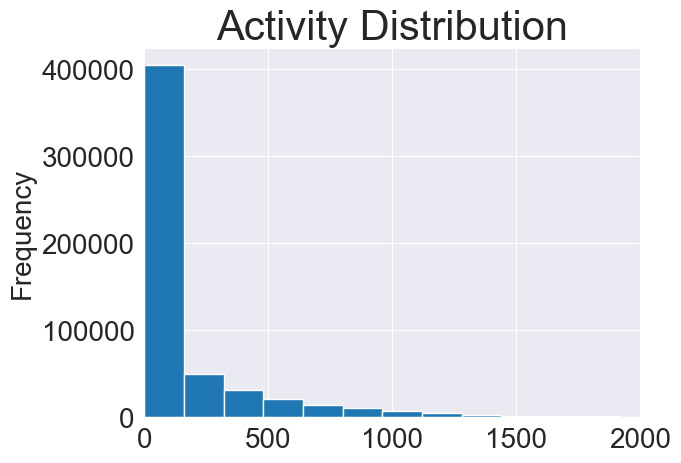

In [37]:
df['activity'].plot(kind='hist', bins=50, title='Activity Distribution')
plt.xlim(0,2000)

In [38]:
scaler = MinMaxScaler()
activity_data = df['activity'].values.reshape(-1, 1)
df['activity'] = scaler.fit_transform(activity_data)
df

,timestamp,Dates,Time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07 12:00:00,2003-05-07,12:00:00,Wednesday,1,0.000000,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-07 12:01:00,2003-05-07,12:01:00,Wednesday,1,0.017875,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-07 12:02:00,2003-05-07,12:02:00,Wednesday,1,0.000000,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-07 12:03:00,2003-05-07,12:03:00,Wednesday,1,0.002500,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-07 12:04:00,2003-05-07,12:04:00,Wednesday,1,0.020750,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,15:03:00,Thursday,9,0.000000,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551712,2004-06-10 15:04:00,2004-06-10,15:04:00,Thursday,9,0.000000,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551713,2004-06-10 15:05:00,2004-06-10,15:05:00,Thursday,9,0.056125,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551714,2004-06-10 15:06:00,2004-06-10,15:06:00,Thursday,9,0.000000,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0


(0.0, 1.0)

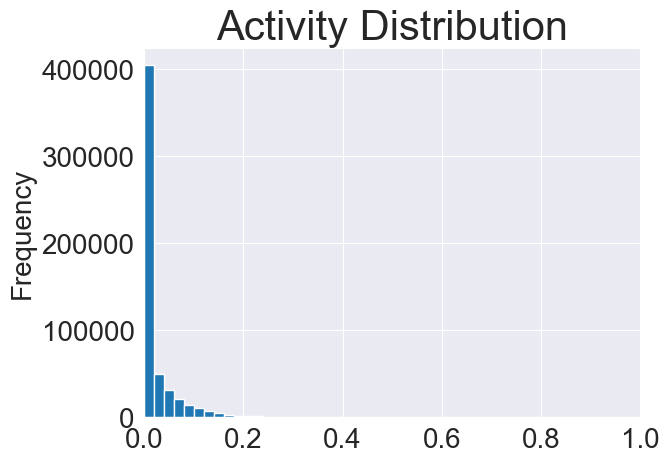

In [39]:
df['activity'].plot(kind='hist', bins=50, title='Activity Distribution')
plt.xlim(0,1)

In [40]:
df

,timestamp,Dates,Time,DayName,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs_mean
0,2003-05-07 12:00:00,2003-05-07,12:00:00,Wednesday,1,0.000000,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
1,2003-05-07 12:01:00,2003-05-07,12:01:00,Wednesday,1,0.017875,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
2,2003-05-07 12:02:00,2003-05-07,12:02:00,Wednesday,1,0.000000,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
3,2003-05-07 12:03:00,2003-05-07,12:03:00,Wednesday,1,0.002500,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
4,2003-05-07 12:04:00,2003-05-07,12:04:00,Wednesday,1,0.020750,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551711,2004-06-10 15:03:00,2004-06-10,15:03:00,Thursday,9,0.000000,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551712,2004-06-10 15:04:00,2004-06-10,15:04:00,Thursday,9,0.000000,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551713,2004-06-10 15:05:00,2004-06-10,15:05:00,Thursday,9,0.056125,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0
551714,2004-06-10 15:06:00,2004-06-10,15:06:00,Thursday,9,0.000000,13,2,45-49,1.0,2.0,2.0,6-10,1.0,2.0,26.0,26.0,26.0


C:\Users\Christina\AppData\Local\Temp\ipykernel_139424\2582648528.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_day_data['timestamp'] = pd.to_datetime(user_day_data['timestamp'])
C:\Users\Christina\AppData\Local\Temp\ipykernel_139424\2582648528.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_day_data['Date'] = user_day_data['timestamp'].dt.date  # Extract the date
C:\Users\Christina\AppData\Local\Temp\ipykernel_139424\2582648528.py:8: SettingWithCopyWarning: 
A value is trying to be set 

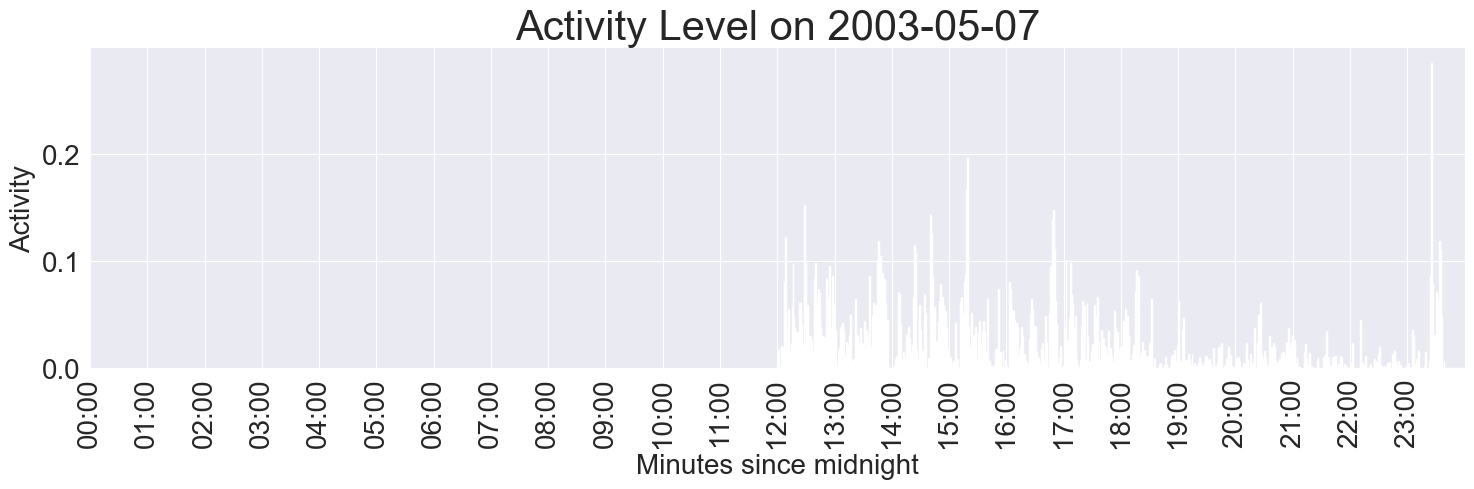

In [41]:
user_data = df[df['user_id'] == 1]
user_day_data = user_data[user_data['Dates'] == '2003-05-07']
user_day_data

selected_date = '2003-05-07'
user_day_data['timestamp'] = pd.to_datetime(user_day_data['timestamp'])
user_day_data['Date'] = user_day_data['timestamp'].dt.date  # Extract the date
user_day_data['Time'] = user_day_data['timestamp'].dt.time  # Extract the time
user_day_data = user_day_data[user_day_data['Date'] == pd.to_datetime(selected_date).date()]

# Plotting
plt.figure(figsize=(15, 5))  # Wider figure to represent each minute
# Convert 'Time' to a numerical value (minutes since midnight)
user_day_data['Minutes'] = user_day_data['timestamp'].dt.hour * 60 + user_day_data['timestamp'].dt.minute
plt.bar(user_day_data['Minutes'], user_day_data['activity'], width=1, align='edge')

# Formatting the plot
plt.title(f'Activity Level on {selected_date}')
plt.xlabel('Minutes since midnight')
plt.ylabel('Activity')
plt.grid(True)
plt.xticks(ticks=range(0, 1440, 60), labels=[f"{str(i).zfill(2)}:00" for i in range(24)], rotation=90)
plt.xlim(0, 1440)  # Set x-axis limit to cover one day

# Display the plot
plt.tight_layout()
plt.show()

C:\Users\Christina\AppData\Local\Temp\ipykernel_139424\683621004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['timestamp'] = pd.to_datetime(user_data['timestamp'])
C:\Users\Christina\AppData\Local\Temp\ipykernel_139424\683621004.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_data['Date'] = user_data['timestamp'].dt.date
C:\Users\Christina\AppData\Local\Temp\ipykernel_139424\683621004.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


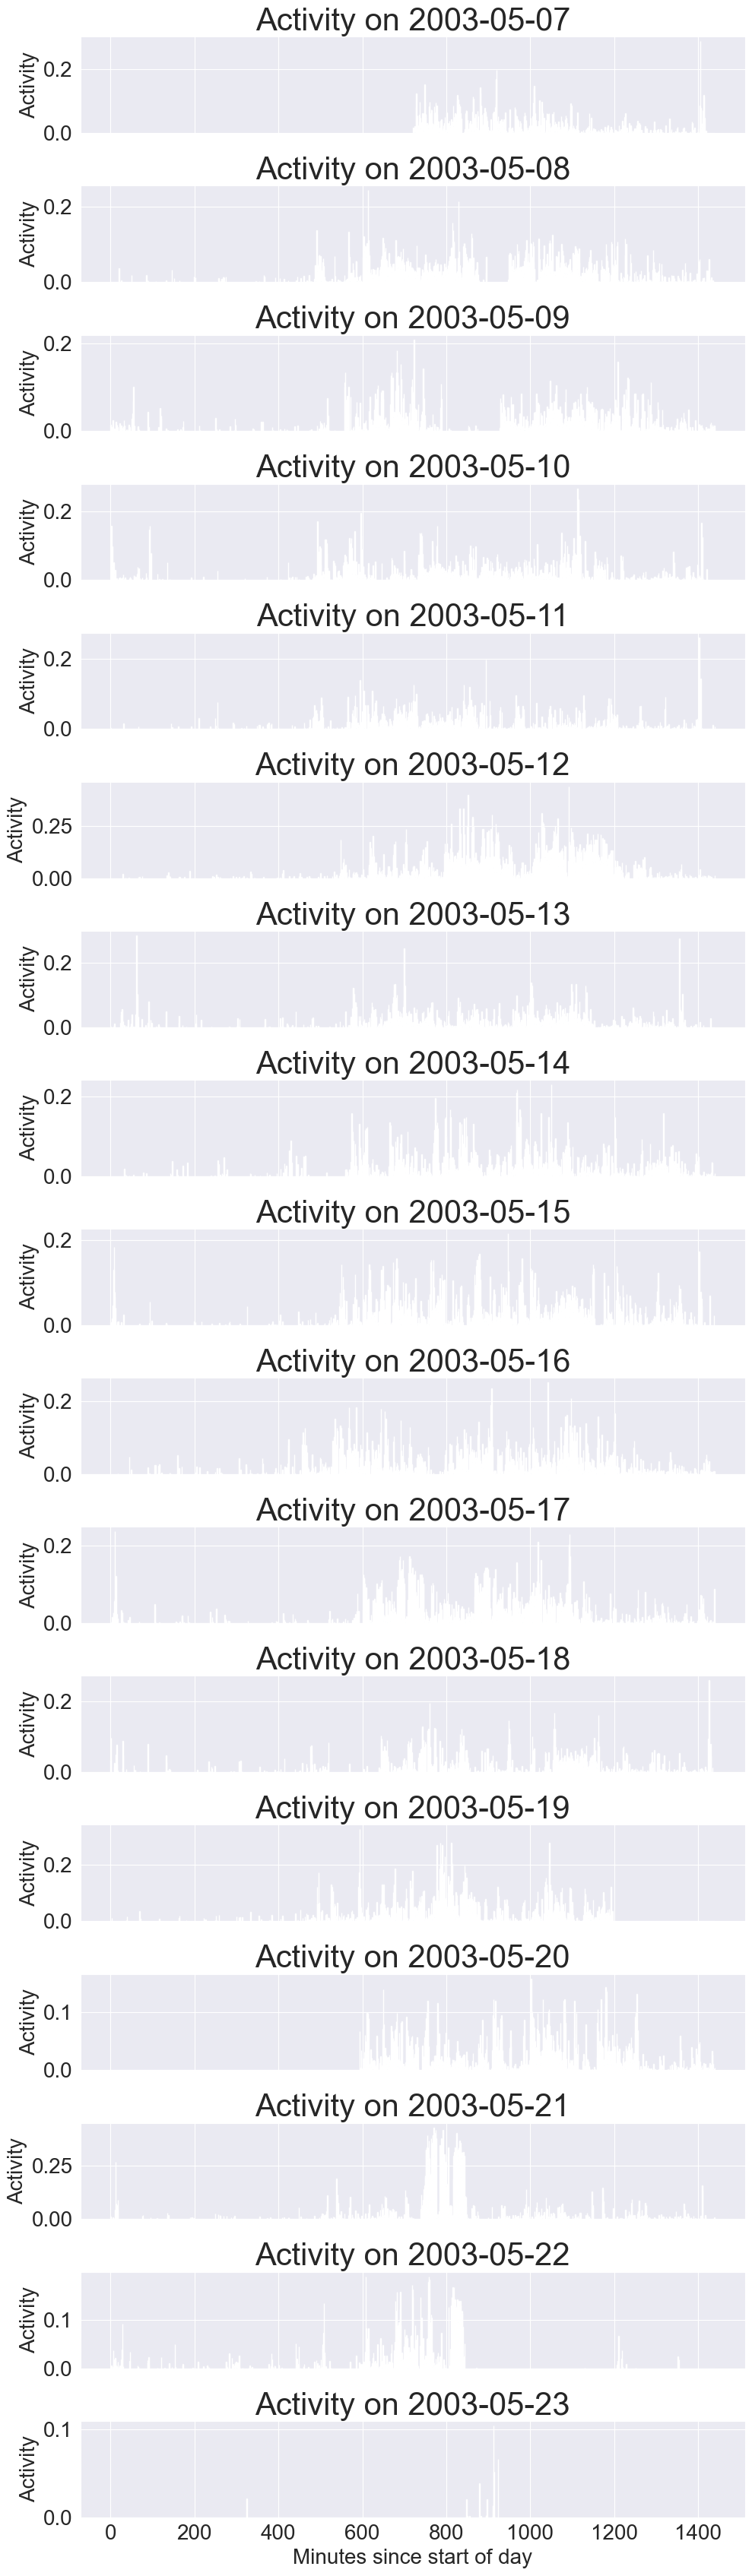

In [42]:
user_data = df[df['user_id'] == 1]
user_data

user_data['timestamp'] = pd.to_datetime(user_data['timestamp'])
user_data['Date'] = user_data['timestamp'].dt.date
user_data['Time'] = user_data['timestamp'].dt.time

unique_days = user_data['Date'].unique()

fig, axes = plt.subplots(len(unique_days), 1, figsize=(10, 2 * len(unique_days)), sharex=True)
user_data['TimeDelta'] = user_data['timestamp'] - user_data['timestamp'].dt.normalize()
user_data['Minutes'] = user_data['TimeDelta'].dt.total_seconds() / 60

for ax, day in zip(axes, unique_days):
    day_data = user_data[user_data['Date'] == day]
    ax.bar(day_data['Minutes'], day_data['activity'], width=1, align='edge')
    ax.set_title(f'Activity on {day}')
    ax.set_ylabel('Activity')
    ax.grid(True)
plt.xlabel('Minutes since start of day')
plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming user_data is already loaded and filtered for the specific day (2003-05-07)
# Here's an example of how to save the bar plot for the activity of each minute in a day

# Convert 'timestamp' column to datetime
user_data['timestamp'] = pd.to_datetime(user_data['timestamp'])
# Extract date and time from 'timestamp'
user_data['Date'] = user_data['timestamp'].dt.date
user_data['Time'] = user_data['timestamp'].dt.time

# Filter data for a single day
single_day_data = user_data[user_data['Date'] == pd.to_datetime('2003-05-07')]

# Convert 'Time' to minutes since midnight
single_day_data['Minutes'] = single_day_data['timestamp'].dt.hour * 60 + single_day_data['timestamp'].dt.minute

# Create the bar plot
plt.figure(figsize=(15, 5))  # Adjust the size as needed
plt.bar(single_day_data['Minutes'], single_day_data['activity'], width=1, align='edge')

# Formatting the plot
plt.title('Activity Level on 2003-05-07')
plt.xlabel('Minutes since midnight')
plt.ylabel('Activity')
plt.grid(True)

# Save the plot to files
plt.savefig('activity_20030507.eps', format='eps')
plt.savefig('activity_20030507.png', format='png')

# Close the plot to prevent it from displaying
plt.close()
